In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def linear_regression(X, y):
    # Добавляем столбец единиц для учета свободного члена
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем 1 для каждого экземпляра

    # Решаем систему нормальных уравнений
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best


def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем столбец 1
    return X_b.dot(theta)


def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)


data = pd.read_csv("california_housing_train.csv")
data_description = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [3]:
data_description = data.describe()
data_description

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


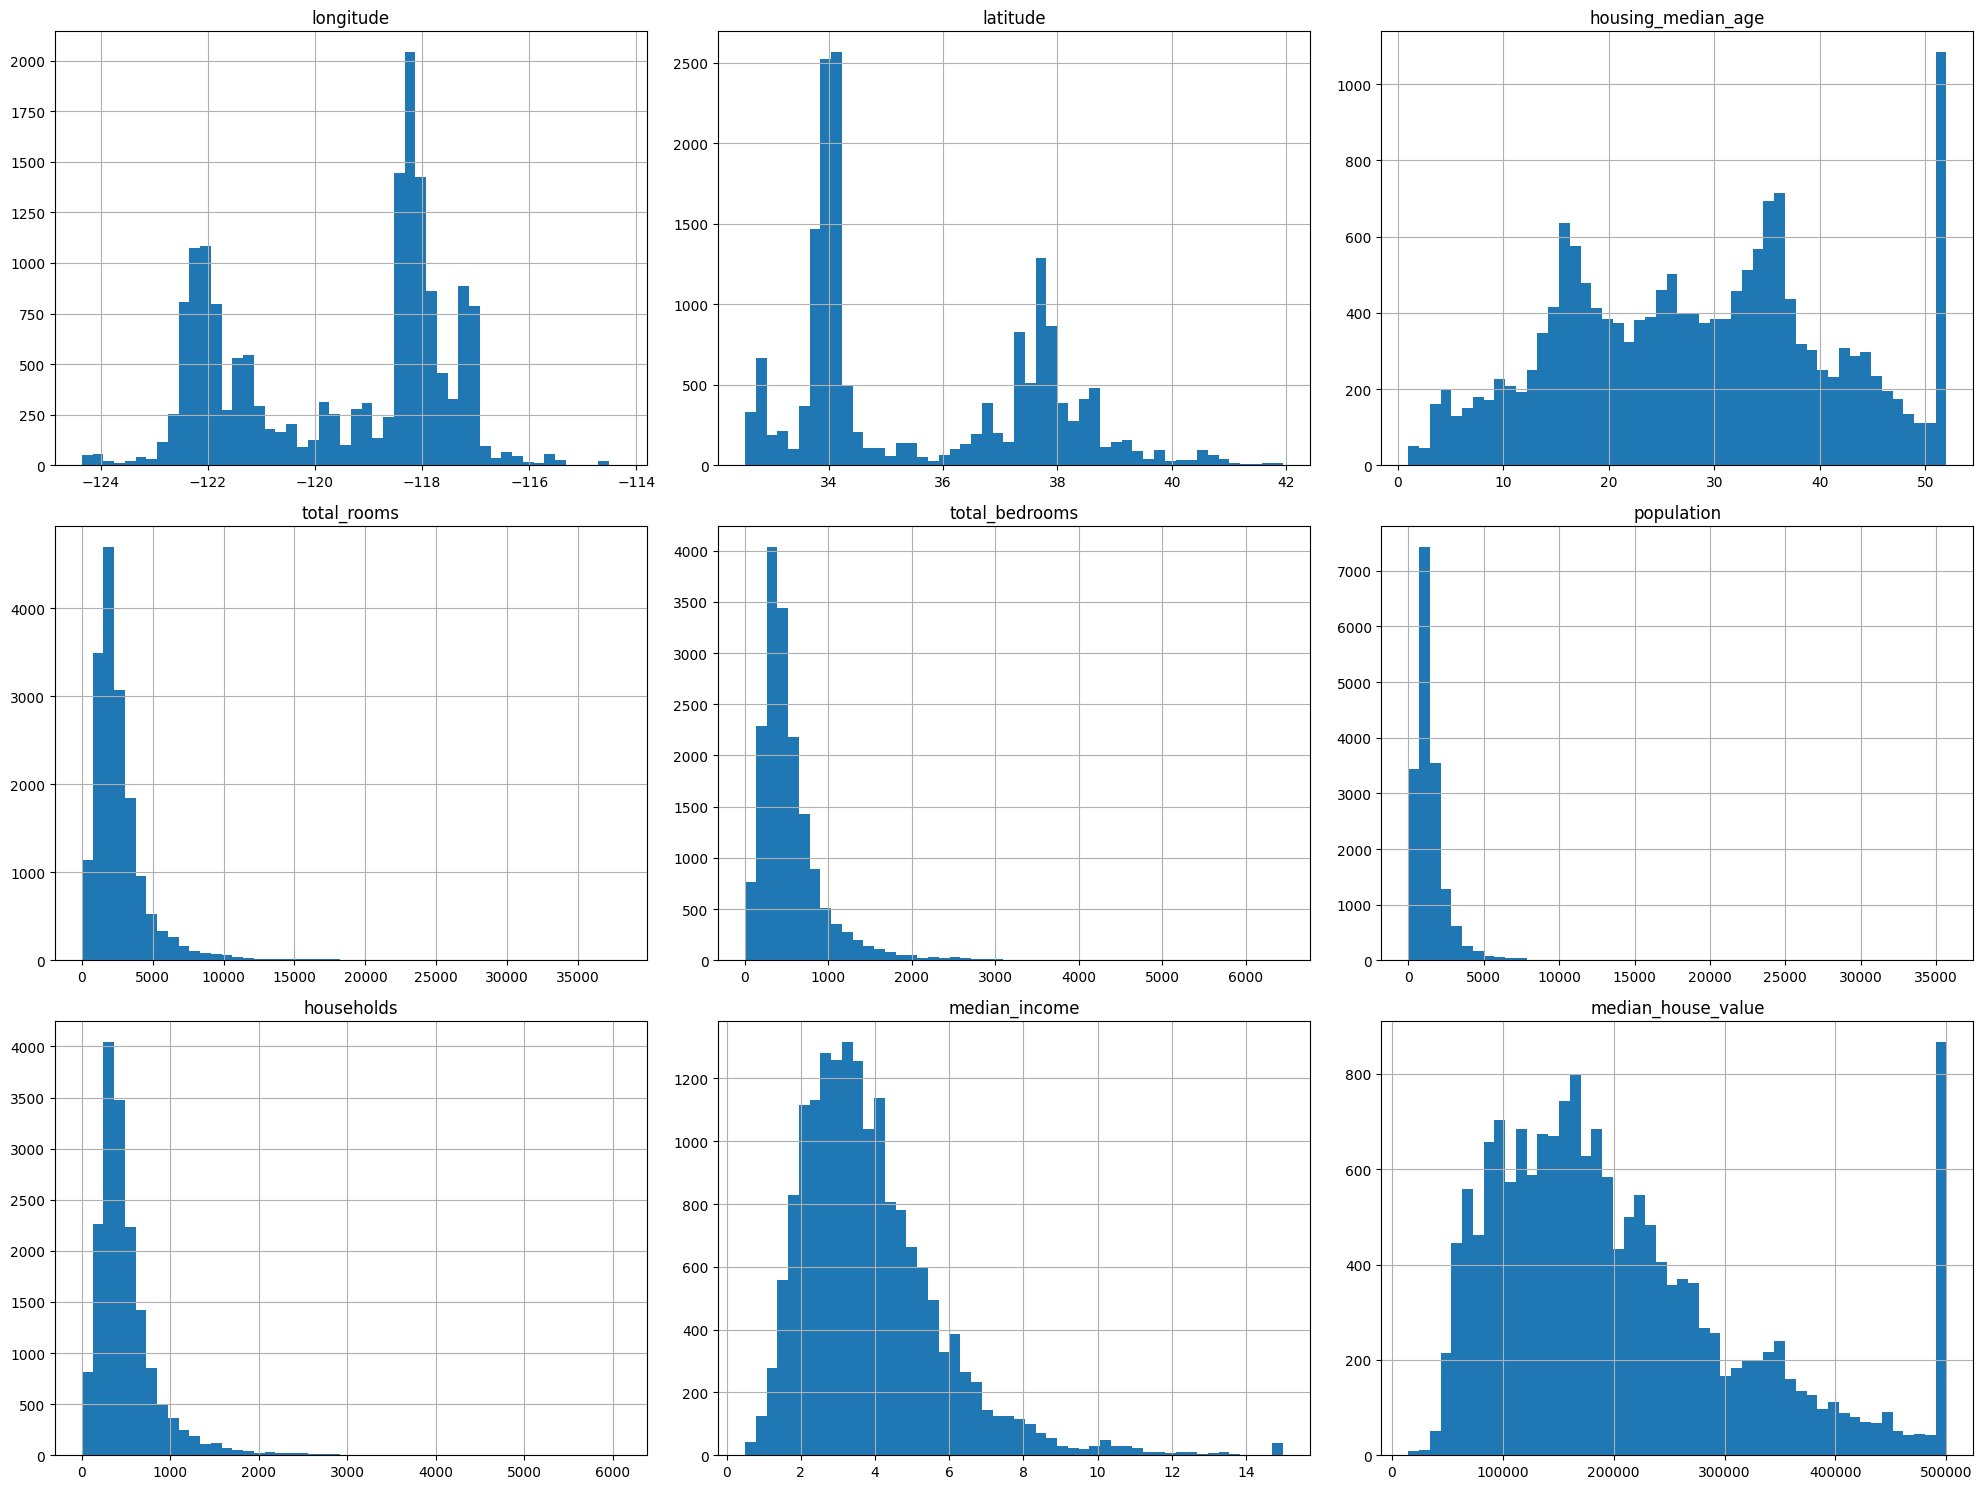

In [4]:
data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Нормализация

In [5]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

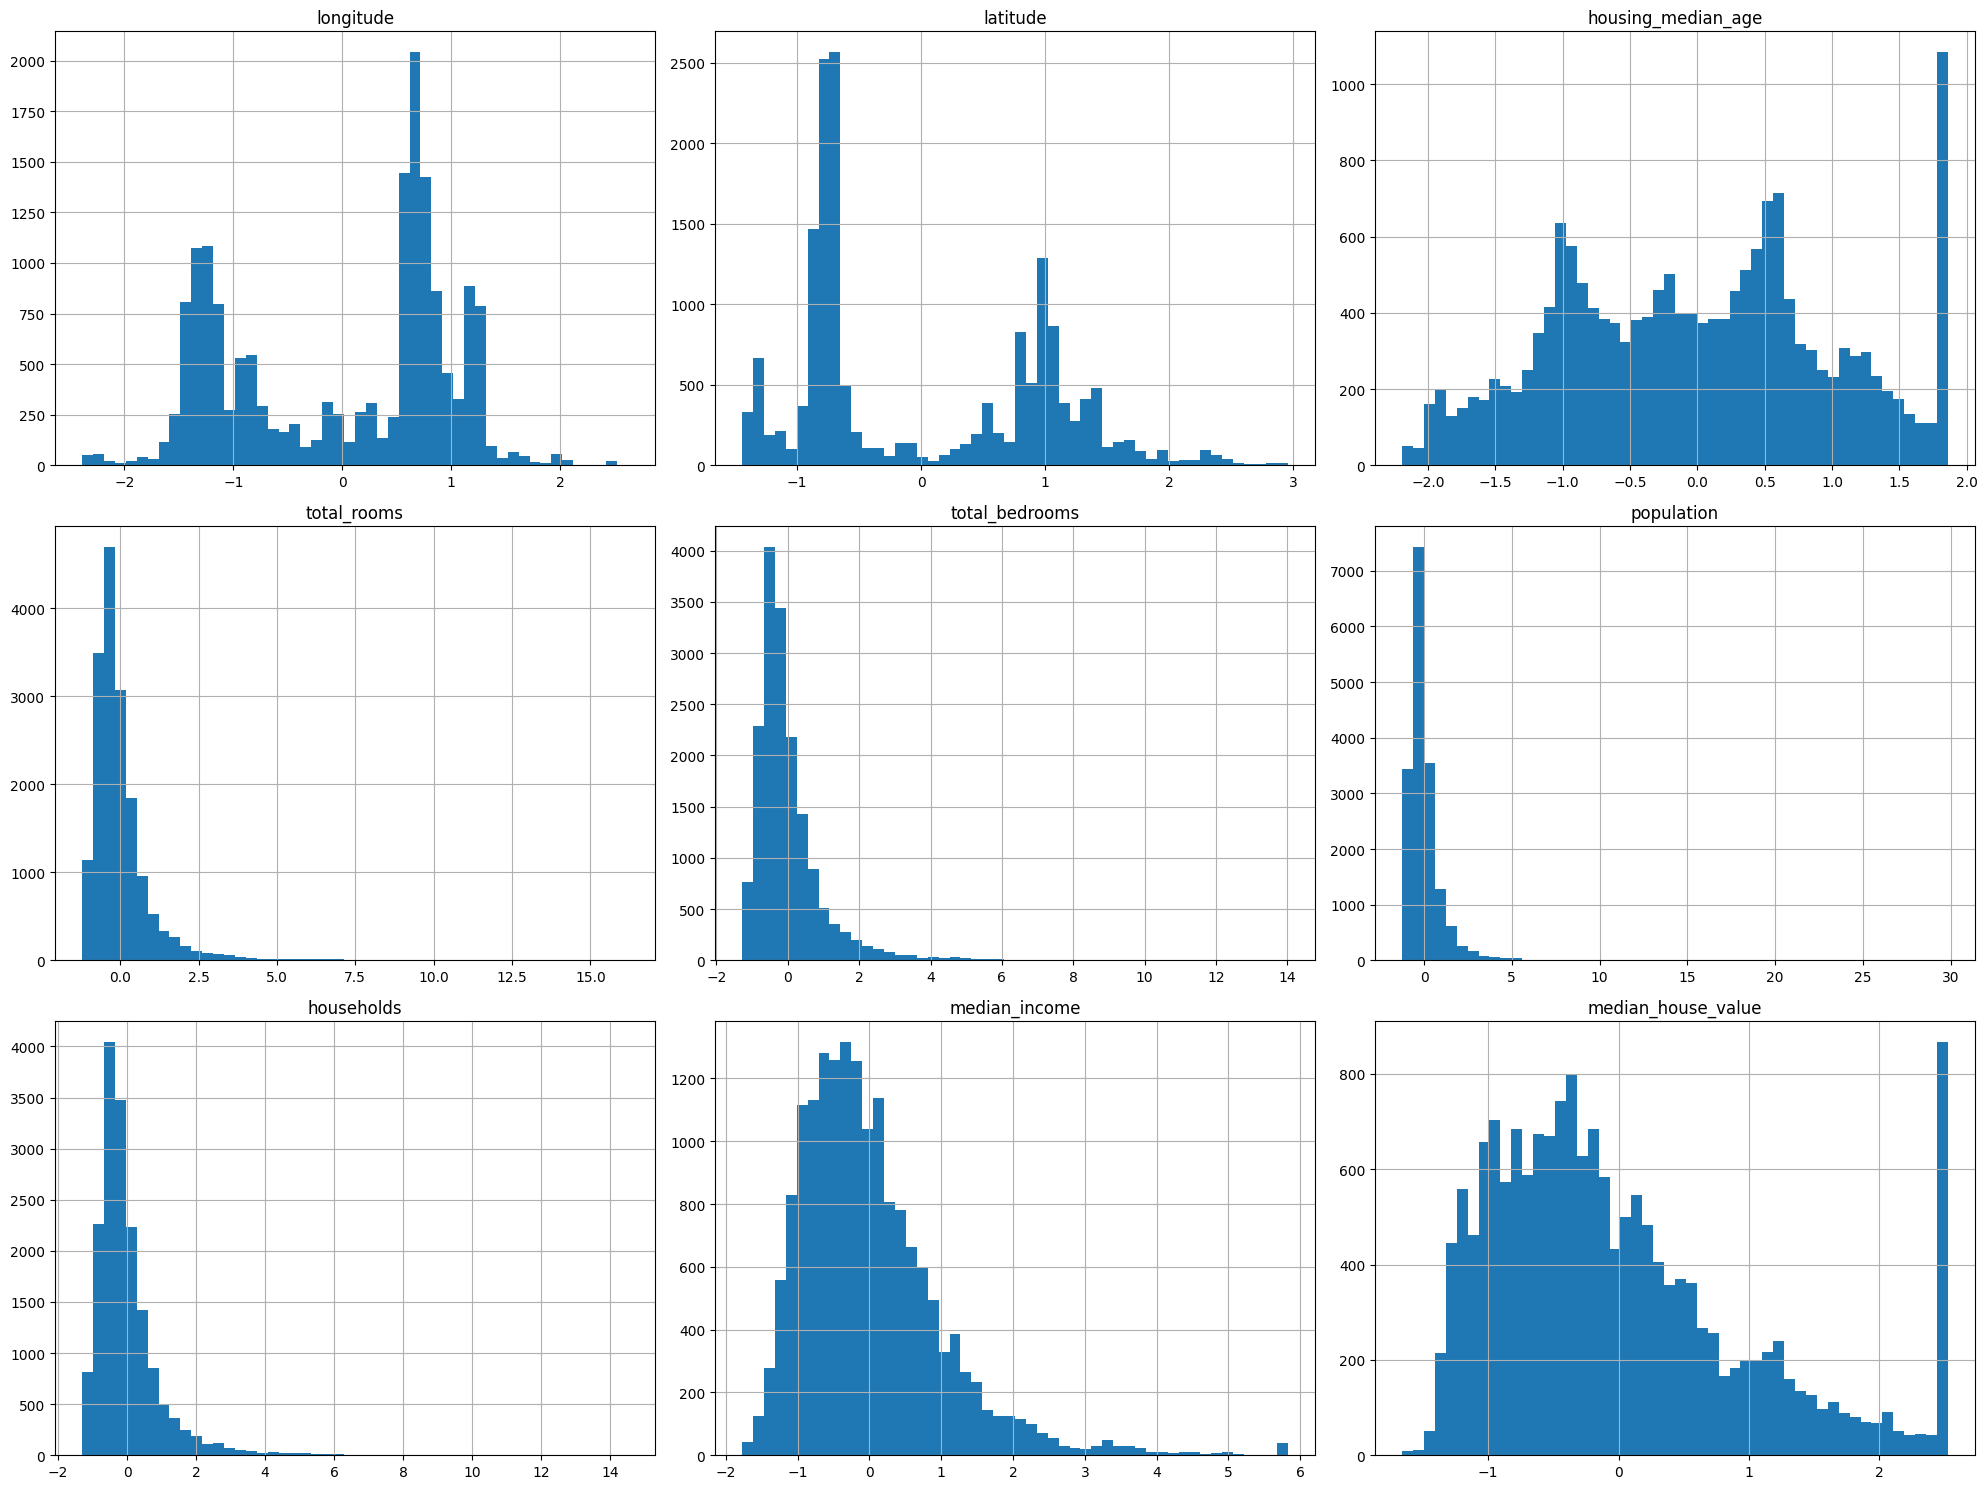

In [6]:
scaled_data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Синтетический признак

In [7]:
scaled_data['people_per_bedroom'] = scaled_data['population'] / scaled_data['total_bedrooms']

In [8]:
X = scaled_data.drop("median_house_value", axis=1)  # Независимые переменные
y = scaled_data["median_house_value"]  # Зависимая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

### Модель 1. Все признаки

In [9]:
X_train_1, X_test_1 = X_train, X_test
theta_1 = linear_regression(X_train_1, y_train)
y_pred_1 = predict(X_test_1, theta_1)
r2_1 = r2_score(y_test, y_pred_1)
r2_1

0.6249264402980292

### Модель 2. Только демографические признаки

In [10]:
X_train_2, X_test_2 = (
    X_train[["population", "households", "median_income", "people_per_bedroom"]],
    X_test[["population", "households", "median_income", "people_per_bedroom"]],
)
theta_2 = linear_regression(X_train_2, y_train)
y_pred_2 = predict(X_test_2, theta_2)
r2_2 = r2_score(y_test, y_pred_2)

r2_2

0.4908460915921792

### Модель 3. По ощущениям

In [11]:
X_train_3, X_test_3 = (
    X_train[["population", "households", "median_income", "latitude", "longitude"]],
    X_test[["population", "households", "median_income", "latitude", "longitude"]],
)
theta_3 = linear_regression(X_train_3, y_train)
y_pred_3 = predict(X_test_3, theta_3)
r2_3 = r2_score(y_test, y_pred_3)
r2_3

0.6071233221292778